In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Path ke direktori dataset
train_dir = "./dataset/hsv_masking/train"
validation_dir = "./dataset/rgb/val"

In [3]:
# Parameter augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load data latih
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

# Load data validasi
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=64,
    class_mode='categorical'
)

Found 1252 images belonging to 3 classes.
Found 315 images belonging to 3 classes.


In [4]:
# Define the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [5]:
# Checkpoint
filepath = "./models/Baru/ResNet50-HSV.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
callback_list = [checkpoint]

# Train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    callbacks=callback_list)

# Save the final model
model.save("./models/Baru/ResNet50-HSV.h5")

Epoch 1/50


c:\Users\CATUR WARGA COMPUTER\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.6405 - loss: 1.0817 - precision: 0.6836 - recall: 0.5528 
Epoch 1: val_loss improved from inf to 1.55788, saving model to ./models/Baru/ResNet50-HSV.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 422s 20s/step - accuracy: 0.6471 - loss: 1.0569 - precision: 0.6907 - recall: 0.5606 - val_accuracy: 0.3175 - val_loss: 1.5579 - val_precision: 0.1513 - val_recall: 0.0730
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.9436 - loss: 0.1680 - precision: 0.9577 - recall: 0.9180 
Epoch 2: val_loss did not improve from 1.55788
20/20 ━━━━━━━━━━━━━━━━━━━━ 372s 18s/step - accuracy: 0.9442 - loss: 0.1664 - precision: 0.9583 - recall: 0.9185 - val_accuracy: 0.3333 - val_loss: 3.8294 - val_precision: 0.3333 - val_recall: 0.3333
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9671 - loss: 0.1051 - precision: 0.9822 - recall: 0.9402 
Epoch 3: val_loss did not improve from 1.55788
20/20 ━━━━━━━━━━━━━━━━━━━━ 375s 18s/step - accuracy: 0.9

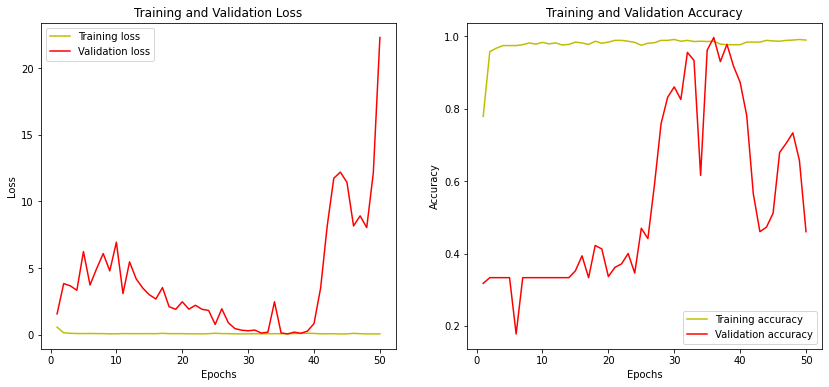

In [6]:
# Plotting
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Training and Validation Loss
ax1.plot(epochs, loss, 'y', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plotting Training and Validation Accuracy
ax2.plot(epochs, acc, 'y', label='Training accuracy')
ax2.plot(epochs, val_acc, 'r', label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()